In [ ]:
# 讀取檔案並分析
import pandas as pd

df = pd.read_csv('/home/sun/Draw/Drink.csv', encoding='utf-8')
df.head(10)

In [2]:
# 從Drink.csv找6家飲料店標題出現的文章和出現次數
import pandas as pd
# 讀取Drink.csv檔案
df = pd.read_csv('Drink.csv', encoding='utf-8')
# Drink.csv = df

keywords = ['清心', '迷客夏', '50嵐', '麻古', 'Comebuy', 'CoCo']
filtered_list = []

for keyword in keywords:
    filtered_df = df[df['標題'].str.contains('清心', na=False)]
    df_temp = df[df['標題'].str.contains(keyword, case=False, na=False)].copy()
    df_temp['關鍵字'] = keyword
    df_temp['文章網址'] = 'https://www.ptt.cc/bbs/Drink/' + df_temp['文章編碼'] + '.html'
    filtered_list.append(df_temp)

# 合併所有品牌結果
df_all = pd.concat(filtered_list, ignore_index=True)

# 選擇想要輸出的欄位
output_columns = ['關鍵字', '標題', '文章網址', '內文', '日期', '總留言數', '推', '噓', '所有留言']
df_all = df_all[output_columns]

# 輸出為 CSV 檔案
df_all.to_csv('ptt_drink_六品牌文章彙整.csv', index=False, encoding='utf-8-sig')

# 統計篇數rink	公告	[公告] 敬告洗文章數之使用者	近來發現多有新註冊之ID，因本版發文門檻較低， 張貼灌水文以洗文章數，甚有跨版連發之舉，實為不當之舉。 即日起將更加嚴格執行版規四，以及取締寥寥數語之發問文 ex1: 請問xx地區有某某店嗎 ? ex2: 某某店怎麼走 ? 這類資訊，使用google以後馬上就可以得到一堆， 請勿張貼類似文章以洗文章數，謝謝配合。 板僕 ILoveRiva	Tue Apr 19 21:52:25 2011	批踢踢實業坊(ptt.cc)	6	1	3	2	2	[{'type': '→', 'user': 'XDDDDDD', 'content': 'XD', 'ipdatetime': '04/20 00:28'}, {'type': '推', 'user': 'much5566', 'content': 'D', 'ipdatetime': '11/29 21:04'}, {'type': '→', 'user': 'prince', 'content': ':XD', 'ipdatetime': '07/28 02:54'}, {'type': '噓', 'user': 'ontherun3325', 'content': 'XD', 'ipdatetime': '05/19 16:34'}, {'type': '推', 'user': 'pokolo', 'content': '不可以調高一點嗎', 'ipdatetime': '08/26 14:43'}, {'type': '推', 'user': 'a23529886', 'content': 'xdddd', 'ipdatetime': '06/11 12:47'}]

brand_counts = df_all['關鍵字'].value_counts()

print("✅ 已匯出 csv：ptt_drink_六品牌文章彙整.csv")
print("📊 各品牌篇數統計：")
print(brand_counts)


✅ 已匯出 csv：ptt_drink_六品牌文章彙整.csv
📊 各品牌篇數統計：
關鍵字
50嵐        993
清心         778
CoCo       278
Comebuy    140
迷客夏         57
麻古          47
Name: count, dtype: int64


In [3]:
# 只要清心的csv存為'ptt_drink_chingshin.csv'
import pandas as pd
# 讀取ptt_drink_六品牌文章彙整.csv檔案
df = pd.read_csv('ptt_drink_六品牌文章彙整.csv', encoding='utf-8')

# 讀取關鍵字為清心的內容
keywords = ['清心']
filtered_list = []

for keyword in keywords:
    filtered_df = df[df['關鍵字'].str.contains('清心', na=False)]
    df_temp = df[df['關鍵字'].str.contains(keyword, case=False, na=False)].copy()
    filtered_list.append(df_temp)

# 合併所有品牌結果
df_chingshin = pd.concat(filtered_list, ignore_index=True)

# 輸出為 CSV 檔案
df_chingshin.to_csv('ptt_drink_chingshin.csv', index=False, encoding='utf-8-sig')
print("已成功匯出含有「清心」關鍵字的文章到 ptt_drink_chingshin.csv")


已成功匯出含有「清心」關鍵字的文章到 ptt_drink_chingshin.csv


In [4]:
# GPT將清心菜單匯出成chingshin_menu.csv
import csv

# 整理好的資料
menu = {
    "茗品系列": ["烏龍綠茶(翡翠烏龍)", "特級綠茶", "錫蘭紅茶", "極品菁茶", "原鄉四季", "特選普洱", "嚴選高山茶"],
    "奶茶系列／奶茶推薦": ["琥珀黑糖奶茶","茶凍奶綠","珍珠奶茶","錫蘭奶紅","烏龍奶茶","特級奶綠","仙草凍奶茶","椰果奶茶","布丁奶茶","暗黑水晶奶茶","粉圓奶茶","蜂蜜奶茶","芝麻奶茶"],
    "鮮奶／拿鐵系列": ["粉戀莓莓","珍珠琥珀黑糖鮮奶","甘蔗鮮奶","雙凍拿鐵","茉綠茶凍拿鐵","紅茶拿鐵","珍珠紅茶拿鐵","珍珠蜂蜜鮮奶普洱","頂級可可拿鐵","鮮奶冬瓜","咖啡拿鐵","粉圓鮮奶茶","珍珠芝麻紅茶拿鐵","濃情巧克力拿鐵"],
    "特調系列": ["妃嚐美荔（蘆薈荔枝紅茶）","荔枝紅茶","Red Bull巨峰葡萄能量果醋","Red Bull巨峰葡萄能量優多","Red Bull紅牛能量藍莓蜜","Red Bull紅牛能量紅茶","梅子綠茶","蜂蜜烏龍","蜂蜜綠茶","頂級可可","濃情巧克力","蜜茶","情人茶","咖啡奶茶","芋香奶茶"],
    "季節鮮果系列": ["紅心芭樂檸檬","蜜桃凍紅茶","甘蔗金桔","甘蔗菁茶","甘蔗四季","鳳梨紅茶","蜂蜜檸檬","蘆薈蜂蜜檸檬","金桔檸檬","檸檬紅茶","檸檬綠茶","檸檬汁","桔茶"],
    "冬瓜／百香果系列": ["雙Q百香果綠茶","百香果綠茶","冬瓜茶","冬瓜菁茶","冬瓜檸檬"],
    "優多系列": ["優多莓莓","紅心芭樂優多","優多百香果綠茶","優多綠茶","蘆薈優多綠茶","優多檸檬"],
    "冰淇淋系列": ["冰淇淋紅茶","冰淇淋奶茶","〖紅茶三兄弟〗珍珠冰淇淋布丁紅茶"],
    "果醋系列": ["荔枝蘋果醋","蘋果醋","蘋果醋紅茶","蜂蜜蘋果醋","藍莓醋","蘆薈藍莓醋","蜂蜜藍莓醋","蘆薈蘋果醋","蜂蜜蘋果醋紅茶","藍莓醋紅茶","優多藍莓醋"],
    "冬季熱飲系列": ["桂圓茶","桂圓鮮奶茶","薑薑好茶","薑薑奶茶"],
    "益生菌纖維系列": ["益生菌纖維奶茶","益生菌纖維綠茶","益生菌纖維紅茶"],
}

# 寫入 CSV
with open('chingshin_menu.csv', 'w', newline='', encoding='utf-8-sig') as f:
    writer = csv.writer(f)
    writer.writerow(['分類', '飲品名稱'])
    for cat, items in menu.items():
        for name in items:
            writer.writerow([cat, name])

print("✅ 已成功建立 'chingshin_menu.csv'，共計", sum(len(v) for v in menu.values()), "筆資料。")

✅ 已成功建立 'chingshin_menu.csv'，共計 94 筆資料。


In [5]:
# 從檔案ptt_drink_chingshin.csv中"標題"、"內文"和"所有留言"的內容
# 比對清心菜單中的"飲品名稱"內容，看有沒有相似的，統計內容和出現次數

import pandas as pd

# 讀取文章與菜單
df_articles = pd.read_csv('ptt_drink_chingshin.csv', encoding='utf-8')
df_menu = pd.read_csv('chingshin_menu.csv', encoding='utf-8')

# 將飲品名稱轉成清單
drink_names = df_menu['飲品名稱'].dropna().tolist()

# 合併文章文字欄位
df_articles['合併內容'] = df_articles[['標題', '內文', '所有留言']].fillna('').agg(' '.join, axis=1)

# 統計出現次數
from collections import Counter
counter = Counter()

for text in df_articles['合併內容']:
    for drink in drink_names:
        if drink in text:
            counter[drink] += 1

# 結果轉成 DataFrame 並依照出現次數排序
result_df = pd.DataFrame(counter.items(), columns=['飲品名稱', '出現次數']).sort_values(by='出現次數', ascending=False)

# 匯出結果
result_df.to_csv('chingshin_drink_match.csv', index=False, encoding='utf-8-sig')

print("已完成飲品比對與統計，結果已儲存為 chingshin_drink_match.csv")


已完成飲品比對與統計，結果已儲存為 chingshin_drink_match.csv


In [ ]:
# 查有沒有中文字體
# ls /System/Library/Fonts

# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib

# 改style要在改font之前
# plt.style.use('seaborn')

matplotlib.font_manager.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')


/tmp/ipykernel_8644/3652982829.py:35: UserWarning: Glyph 28165 (\N{CJK UNIFIED IDEOGRAPH-6E05}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_8644/3652982829.py:35: UserWarning: Glyph 24515 (\N{CJK UNIFIED IDEOGRAPH-5FC3}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_8644/3652982829.py:35: UserWarning: Glyph 39154 (\N{CJK UNIFIED IDEOGRAPH-98F2}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_8644/3652982829.py:35: UserWarning: Glyph 21697 (\N{CJK UNIFIED IDEOGRAPH-54C1}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_8644/3652982829.py:35: UserWarning: Glyph 35342 (\N{CJK UNIFIED IDEOGRAPH-8A0E}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_8644/3652982829.py:35: UserWarning: Glyph 35542 (\N{CJK UNIFIED IDEOGRAPH-8AD6}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_8644/3652982829.py:35: UserWarning: Glyph 29105 (\N{CJK UNIFIED IDEOGRAPH-71B1}) missing from current font.
  plt.tight_l

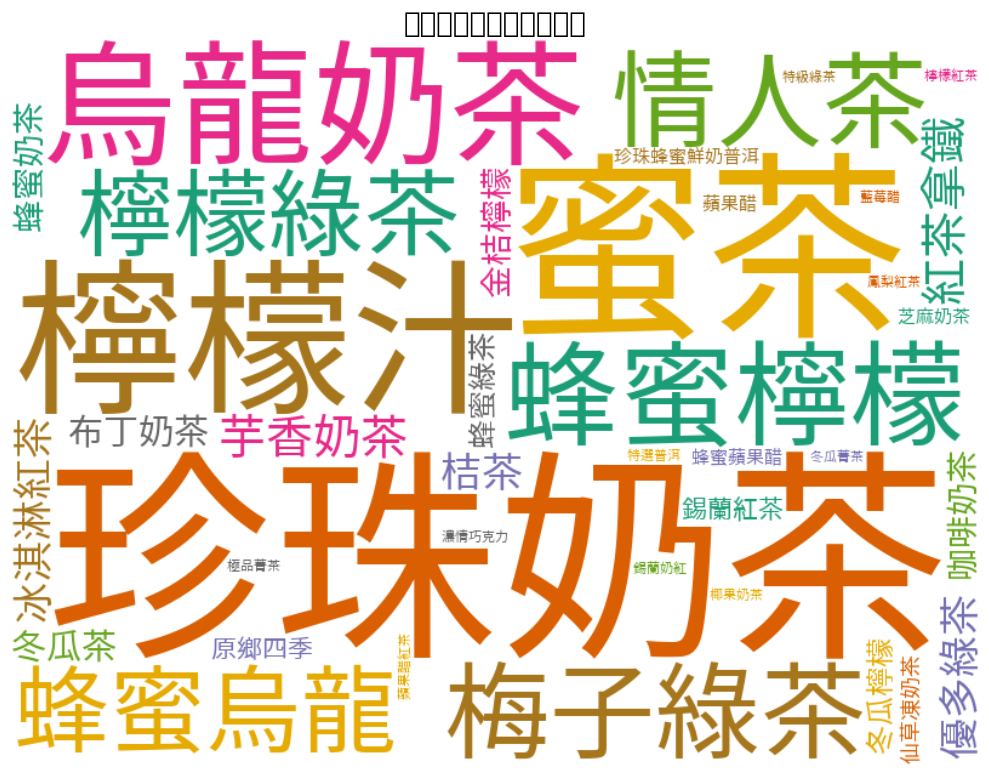

In [6]:
# GPT幫作的雲字圖

# 中文字要下載套件!wget https://github.com/googlefonts/noto-cjk/raw/main/Sans/OTF/TraditionalChinese/NotoSansTC-Regular.otf

import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 讀取飲品出現次數統計檔
df = pd.read_csv('chingshin_drink_match.csv', encoding='utf-8')

# 轉換成 dict 給 WordCloud 使用
freq_dict = dict(zip(df['飲品名稱'], df['出現次數']))

# 設定中文字型路徑（請依實際電腦環境修改）
# font_path = "/System/Library/Fonts/STHeiti Light.ttc"  # Mac
#font_path = "C:/Windows/Fonts/msjh.ttc"  # Windows（微軟正黑體）
# font_path = "Noto Sans CJK" #Linux
# 試了幾個都不行所以新增上面那個程式碼

font_path = "TaipeiSansTCBeta-Regular.ttf"

# 建立雲字圖
wordcloud = WordCloud(font_path=font_path,
                      width=800,
                      height=600,
                      background_color='white',
                      colormap='Dark2').generate_from_frequencies(freq_dict)

# 顯示圖形
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("清心飲品討論熱度雲字圖", fontsize=20)
plt.tight_layout()
plt.show()